# 1 Получение данных

In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import statistics

In [27]:
df = pd.read_csv("БД_Риэлтор.csv", ';')
df.head()

,Rooms,DistMetro,Area,Price
0,3,12,56,9396
1,2,4,54,9785
2,1,2,31,5783
3,2,8,48,9123
4,1,11,31,5662


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Rooms      5000 non-null   int64
 1   DistMetro  5000 non-null   int64
 2   Area       5000 non-null   int64
 3   Price      5000 non-null   int64
dtypes: int64(4)
memory usage: 156.4 KB


In [29]:
# описание основных показателей
df.describe()

,Rooms,DistMetro,Area,Price
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.999200,9.588000,47.558800,8550.912200
std,0.813715,5.795151,17.167431,2985.530681
min,1.000000,0.000000,21.000000,2825.000000
25%,1.000000,5.000000,31.000000,5904.750000
50%,2.000000,10.000000,48.000000,8407.500000
75%,3.000000,15.000000,59.000000,10652.000000
max,3.000000,19.000000,83.000000,17614.000000


Средние значения для каждой колонки

In [30]:
df.mode().head(1)

,Rooms,DistMetro,Area,Price
0,2.0,16.0,29.0,5432


#Описание

Данный набор данных описывает каталог для покупки квартир; датасет имеет 5000 строк, 4 поля: кол-во комнат, расстояние от метро, площадь и цену квартиры. Самая частая цена аренды: 5432 тыс. руб., средняя цена: 8550 тыс. руб. Самая дорогая квартира: 17614 тыс. руб. 

Гистограмма распределение цен

Text(0.5, 0, 'Цена на аренду квартир')

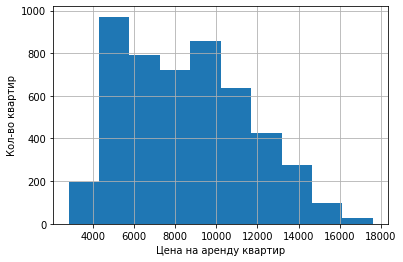

In [31]:
price=df['Price']
hist=price.hist()
hist.set_ylabel('Кол-во квартир')
hist.set_xlabel('Цена на аренду квартир')

Вывод по графику :

Цены распределены по нормальному распределению со сдвигом влево. 

***Оценка кореляции***


Кореляция по цене

In [32]:
price_r_1=price[df['Rooms']==1]
price_r_2=price[df['Rooms']==2]
price_r_3=price[df['Rooms']==3]

Text(0.5, 0, 'Цена однокомнатной квартиры')

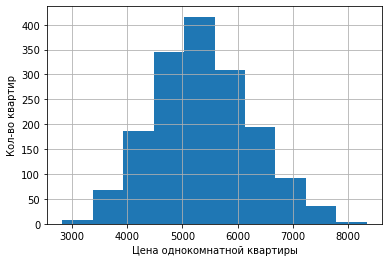

In [33]:
hist1=price_r_1.hist()
hist1.set_ylabel('Кол-во квартир')
hist1.set_xlabel('Цена однокомнатной квартиры')

Text(0.5, 0, 'Цена 2-комнатной квартиры')

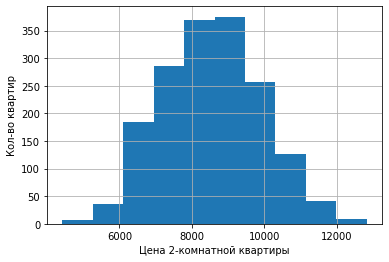

In [34]:
hist2=price_r_2.hist()
hist2.set_ylabel('Кол-во квартир')
hist2.set_xlabel('Цена 2-комнатной квартиры')

Text(0.5, 0, 'Цена 3-комнатной квартиры')

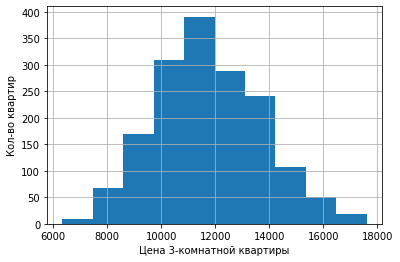

In [35]:
hist3=price_r_3.hist()
hist3.set_ylabel('Кол-во квартир')
hist3.set_xlabel('Цена 3-комнатной квартиры')

## Вывод
Исходя из данных, разделенных по кол-вам комнат, цены на каждое кол-во комнат определяются по *нормальному* распределению. 

***2 Кореляция по площади и цене***



Однокомнатные


In [36]:
room_1=df[df['Rooms']==1]

room_1[['Price', 'Area']].cov()

,Price,Area
Price,780506.330905,1989.519167
Area,1989.519167,11.899206


In [37]:
correlation_1=1989.519167/(statistics.pstdev(room_1['Price'])*statistics.pstdev(room_1['Area']))
print(f"Коэффициент присона: {correlation_1}")
print(f"Коэффициент присона (%): {correlation_1*100}")

Коэффициент присона: 0.6532254508775661
Коэффициент присона (%): 65.32254508775661


Двухкомнатные

In [38]:
room_2=df[df['Rooms']==2]
room_2[['Price', 'Area']].cov()

,Price,Area
Price,1.875752e+06,5793.161991
Area,5.793162e+03,35.914814


In [39]:
correlation_2=5793.161991/(statistics.pstdev(room_2['Price'])*statistics.pstdev(room_2['Area']))
print(f"Коэффициент присона: {correlation_2}")
print(f"Коэффициент присона (%): {correlation_2*100}")


Коэффициент присона: 0.706233412640702
Коэффициент присона (%): 70.6233412640702


Трехкомнатные

In [40]:
room_3=df[df['Rooms']==3]
room_3[['Price', 'Area']].cov()

,Price,Area
Price,3.840079e+06,13052.97479
Area,1.305297e+04,79.99979


In [41]:
correlation_3=13052.97479/(statistics.pstdev(room_3['Price'])*statistics.pstdev(room_3['Area']))
print(f"Коэффициент присона: {correlation_3}")
print(f"Коэффициент присона (%): {correlation_3*100}")

Коэффициент присона: 0.7451742210435901
Коэффициент присона (%): 74.51742210435901


***РАСЧЕТ КВАНТИЛЕЙ***

In [42]:
room_2_more_than_40=room_2[room_2['Area']>40]
room_2_more_than_40

,Rooms,DistMetro,Area,Price
1,2,4,54,9785
3,2,8,48,9123
7,2,12,52,7908
9,2,5,46,8047
15,2,0,49,10305
...,...,...,...,...
4989,2,6,49,9646
4992,2,19,43,9181
4994,2,18,59,11192
4995,2,0,52,8455


In [43]:
room_2_more_than_40.quantile([.25, .50, .75], axis = 0)

,Rooms,DistMetro,Area,Price
0.25,2.0,5.0,45.0,7924.0
0.50,2.0,9.0,49.0,8812.0
0.75,2.0,14.0,53.0,9684.5


In [44]:
print('Первый квантиль: ', room_2_more_than_40['Price'].min(),', ', np.quantile(room_2_more_than_40['Price'], .25) )
print('Второй квантиль: ', np.quantile(room_2_more_than_40['Price'], .25),', ', np.quantile(room_2_more_than_40['Price'], .50) )
print('Третий квантиль: ', np.quantile(room_2_more_than_40['Price'], .50),', ', np.quantile(room_2_more_than_40['Price'], .75) )
print('Четвертый квантиль: ', np.quantile(room_2_more_than_40['Price'], .75),', ', room_2_more_than_40['Price'].max() )

Первый квантиль:  4427 ,  7924.0
Второй квантиль:  7924.0 ,  8812.0
Третий квантиль:  8812.0 ,  9684.5
Четвертый квантиль:  9684.5 ,  12833


***4 Задача***


In [45]:
print(f'Средняя 3-комнатная квартира стоит: {price_r_3.mean()}')

Средняя 3-комнатная квартира стоит: 11749.978221415608


In [46]:
print(f'Кол-во 3-комнатных квартир составляет: {price_r_3.count()}')

Кол-во 3-комнатных квартир составляет: 1653


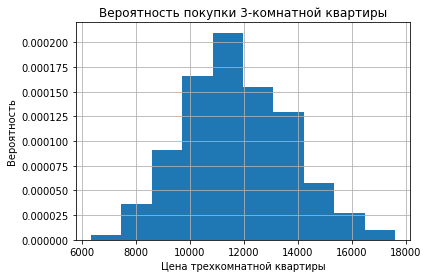

In [47]:
count, bins, ignored=plt.hist(price_r_3, 10, density=True)
plt.title('Вероятность покупки 3-комнатной квартиры')
plt.ylabel('Вероятность')
plt.xlabel('Цена трехкомнатной квартиры')
plt.grid(True)
plt.show()

In [48]:
to_sell = 9200/0.03
print(f'Для получения прибыли в 9200 тыс. руб нужно продать квартир на сумму: {to_sell}')

Для получения прибыли в 9200 тыс. руб нужно продать квартир на сумму: 306666.6666666667


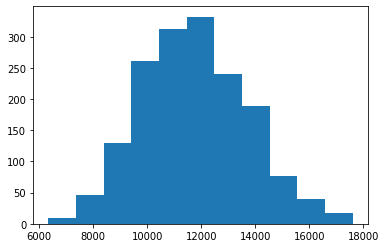

In [49]:
import math
i=math.log(price_r_3.count(),2)+1

inter=np.linspace(6338,17614,12)

density, bins,patches=plt.hist(price_r_3,bins=inter)



1653.0


NameError: name 'x' is not defined

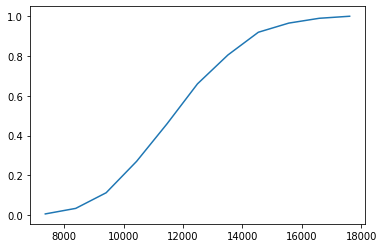

In [50]:
sum=0
for d in density:
    sum=sum+d
print(sum)

chance=np.array([],dtype=float)
for d in density:
    chance=np.append(chance,d/sum)
    
i=1
chance1=np.array([chance[0]],dtype=float)
while i<11:
    chance1=np.append(chance1,chance[i]+chance1[i-1])
    i=i+1

bins=np.delete(bins,0)

plt.plot(bins,chance1)
plt.plot(x,chance1,color='g',linestyle='--')
plt.plot(bins,y,color='g',linestyle='--')
plt.ylabel('Вероятность')
plt.xlabel('Цена трехкомнатной квартиры')
plt.grid(True)
plt.show()

In [ ]:
price_r_3.value_counts(bins=inter)

## Вывод 
Таким образом вероятность получения прибыли в 9200 тыс. руб. составляет 66% при цене средней цене квариры, равной 12488 тыс. руб. 